(C:ssp-bruit)=
# Bruit dans les signaux

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import factorial
from myst_nb import glue

Jusqu'ici, on considérait les signaux comme étant déterministes, c'est à dire qu'on les connaissait de manière sûre.
Ils étaient définis par une forme analytique (par exemple : $x[n] = \sin(2\pi f n)$)
ou une suite d'échantillons (par exemple : $x[n] = [1, 2, 3, 4]$).

Mais en pratique, il est rare que les signaux soient connus exactement et parfaitement.
Les signaux aléatoires (c'est-à-dire non déterministes) sont des signaux qu'on ne peut pas prédire complètement
avant de les avoir observés.
Par exemple :
* un signal bruité est un signal aléatoire, car le bruit n'est pas parfaitement connu
  (si c'était le cas, alors il serait très simple de supprimer le bruit du signal !) ;
* une sinusoïde de fréquence inconnue peut également être considérée comme un signal aléatoire ;
* un signal de communication numérique, au niveau du récepteur, est un signal aléatoire
  puisque le message émis n'est pas connu a priori du récepteur (sinon, il serait inutile de transmettre le message...).

Attention, lorsqu'on a mesuré et enregistré un signal physique, cet enregistrement n'est plus déterministe.
Cependant, une deuxième mesure du même phénomène physique sera différente.
Lorsqu'on parle de signal aléatoire, c'est en fait le phénomène avant la mesure qui est aléatoire !
Ce qui nous intéresse ici, c'est de concevoir un traitement sur un signal qui n'a pas encore été mesuré :
le signal est donc considéré aléatoire.

Pour analyser et traiter ces signaux, on se base sur leurs propriétés statistiques,
telles que leur moyenne ou une distribution de probabilité.
Nous allons donc commencer par quelques rappels de probabilités.

## Rappels de probabilité

Une _variable aléatoire_ est une variable mathématique dont la valeur n'est pas fixée.
Les valeurs possibles de cette variable aléatoire n'ont pas forcément la même probabilité d'apparaître :
La distribution des probabilité d'apparition des valeurs est appelée _densité de probabilité_,
et elle est souvent notée $p$.

Dans ce cours, nous nous concentrons sur les signaux bruités.
Chaque échantillon du bruit est une variable aléatoire à laquelle est associée une densité de probabilité.
Il existe trois modèles de densité de probabilité pour le bruit.


### Densité de probabilité gaussienne

La densité de probabilité gaussienne, ou loi normale, est la bien connue « courbe en cloche ».
En notant $x$ la variable aléatoire, elle a pour expression :

$$
p(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x-\mu^2)}{2\sigma^2}\right),
$$

et dépend de deux paramètres : la moyenne $\mu$ et l'écart-type $\sigma$.
Ainsi, la variable aléatoire peut prendre n'importe quelle valeur sur $\mathbb{R}$,
les valeurs proches de zéro étant plus probables que les valeurs éloignées de zéro.

On note aussi :

$$
x \sim \mathcal{N}(\mu;\sigma).
$$

```{glue:figure} G:ssp:normale
:name: "F:ssp:normale"

Densités de probabilité gaussiennes et 500 réalisations
(à gauche : $\mathcal{N}(0;1)$, à droite : $\mathcal{N}(1;0,3)$).
```


### Densité de probabilité uniforme

Une variable aléatoire $x$ distribuée suivant la densité de probabilité uniforme
peut prendre n'importe quelle valeur sur un intervalle donné, et aucune valeur de cette intervalle n'est privilégiée par rapport à une autre.
Elle a pour expression :

$$
p(x) = 
\begin{cases}
\frac{1}{b-a} &\text{si}\, x\in[a,b], \\
0             &\text{sinon}.
\end{cases}
$$

On note aussi :

$$
x \sim \mathcal{U}[a;b].
$$


```{glue:figure} G:ssp:uniforme
:name: "F:ssp:uniforme"

Densités de probabilité uniformes et 500 réalisations
(à gauche : $\mathcal{U}[0;1]$, à droite : $\mathcal{U}[-2;2]$).
```


### Probabilité de Poisson

Enfin, la loi de [Poisson](https://fr.wikipedia.org/wiki/Sim%C3%A9on_Denis_Poisson)
modélise un processus de comptage (par exemple un nombre de photons sur les pixels d'un capteur CCD).
Elle a pour expression :

$$
p(x) = \frac{\lambda^b}{b!} e^{-b}.
$$

On note aussi :

$$
x \sim \mathcal{P}(\lambda).
$$

```{glue:figure} G:ssp:poisson
:name: "F:ssp:poisson"

Loi de Poisson et 500 réalisations
(à gauche : $\mathcal{P}(1)$, à droite : $\mathcal{P}(5)$).
```


### Caractéristiques statistiques d'une variable aléatoire

* L'_espérance_ d'une variable aléatoire $x$, notée $\mathbb{E}[x]$, correspond à la valeur moyenne des réalisations :
  
  $$
  \mathbb{E}[x] = \int x p(x) dx.
  $$
  
  Lorsqu'on dispose de $N$ réalisations $x[n]$, l'espérance peut être estimée ainsi :
  
  $$
  \hat{\mathbb{E}}[x] = \frac{1}{N} \sum_{n=0}^{N-1} x[n].
  $$
  
* La _variance_ d'une variable aléatoire $x$, notée $\mathbb{V}[x]$,
  correspond à une mesure de la dispersion des réalisations autour de la moyenne :
  
  $$
  \mathbb{V}[x] &= \int \big(x-\mathbb{E}(x)\big)^2 p(x) dx \\
                 &= \mathbb{E} \Big( \big(x-\mathbb{E}(x)\big)^2 \Big) \\
                 &= \mathbb{E}(x^2) - \mathbb{E}(x)^2.
  $$
  
  Lorsqu'on dispose de $N$ réalisations $x[n]$, la variance peut être estimée ainsi :
  
  $$
  \hat{\mathbb{V}}[x] = \frac{1}{N} \sum_{n=0}^{N-1} \big(x[n]-\hat{\mathbb{E}}[x]\big)^2.
  $$
  
* L'_écart type_ d'une variable aléatoire $x$ est la moyenne des écarts des réalisations à la moyenne.
  C'est la racine carrée de la variance :
  
  $$
  \sqrt{\mathbb{V}(x)}.
  $$

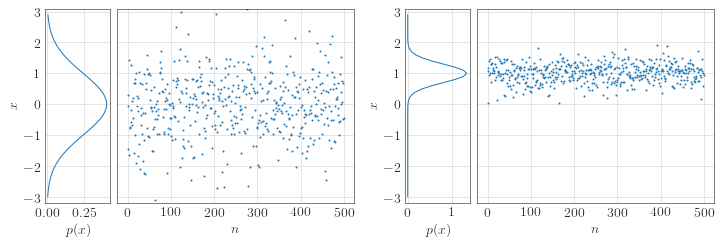

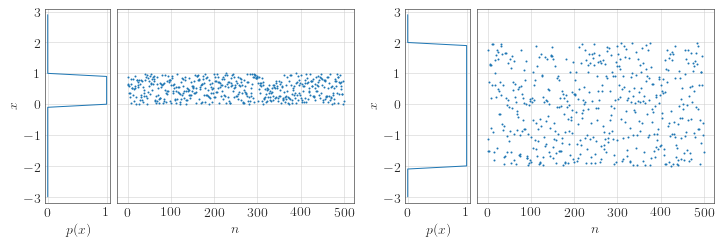

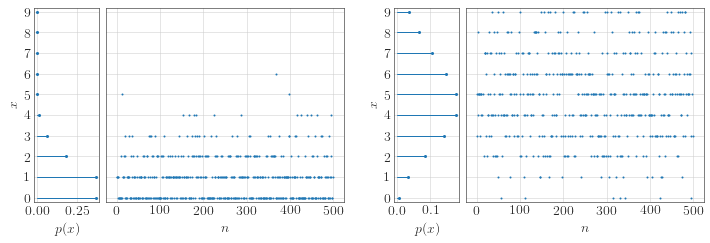

In [2]:
# Réalisations de divers bruits blanc

def myplot(b, pdf1, pdf2, real1, real2, filename, xl, stemize):

    # Généralités
    plt.style.use('seaborn-whitegrid')
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    
    pdfs = [pdf1, pdf2]
    reals = [real1, real2]

    # Figure
    fig = plt.figure(figsize=(10, 3))
    
    for i in range(2):
        
        pdf = pdfs[i]
        real = reals[i]
        
        # Densité de probabilité
        
        ax_pdf = plt.axes([0.1+0.5*i, 0.1, 0.09, 0.9])
        for side in ['bottom', 'top', 'right', 'left']:
            ax_pdf.spines[side].set_color('k')
            ax_pdf.spines[side].set_linewidth(0.5)
        ax_pdf.set_ylim(xl)
        ax_pdf.grid(linewidth=0.5)

        if stemize==1:
            plt.plot(pdf, b, marker='o', markerfacecolor="tab:blue", markersize=2, linestyle="none")
            x = np.array([pdf])
            X = np.concatenate((x*0, x))
            y = np.array([b])
            Y = np.concatenate((y, y))
            plt.figure
            plt.plot(X, Y, 'tab:blue', linewidth=1)
        elif stemize==2:
            plt.plot(pdf, b, 'tab:blue', linewidth=1)
        else:
            plt.plot(pdf, b, 'tab:blue', linewidth=1)
    
        plt.xticks(fontsize=14)
        plt.yticks(np.arange(np.around(xl[0]), np.around(xl[1])+1, 1), fontsize=14)
        plt.xlabel('$p(x)$', fontsize=14)
        plt.ylabel('$x$', fontsize=14)

        # Réalisations
    
        ax_real = plt.axes([0.2+0.5*i, 0.1, 0.33, 0.9])
        for side in ['bottom', 'top', 'right', 'left']:
            ax_real.spines[side].set_color('k')
            ax_real.spines[side].set_linewidth(0.5)
        ax_real.set_ylim(xl)
        ax_real.set_yticklabels([])
        ax_real.grid(linewidth=0.5)
    
        plt.plot(real,'.', markerfacecolor="tab:blue", markersize=2)
    
        plt.xticks(np.arange(0, N+1, 100), fontsize=14)
        plt.yticks(np.arange(np.around(xl[0]), np.around(xl[1])+1, 1), fontsize=14)
        plt.xlabel('$n$', fontsize=14)

    # Enregistrement
    glue("G:ssp:" + filename, fig, display=False)


def rect(n):
    return np.where(np.abs(n)<=.5, 1, 0)


N = 500;

# PDF normale
b = np.arange(-3, 3, 0.1)
mu, sig = 0, 1
pdf1 = np.exp( -(b-mu)**2/2/sig**2 ) / np.sqrt(2*np.pi*sig**2)
real1 = np.random.randn(N)*sig + mu
mu, sig = 1, 0.3
pdf2 = np.exp( -(b-mu)**2/2/sig**2 ) / np.sqrt(2*np.pi*sig**2)
real2 = np.random.randn(N)*sig + mu
myplot(b, pdf1, pdf2, real1, real2, 'normale', [b[0]-.2, b[-1]+.2], 0)

# PDF uniforme
b = np.arange(-3, 3, 0.1)
x1, x2 = 0, 1
d = (x1+x2)/2
T = x2-x1
pdf1 = rect((b-d)/T)
real1 = np.random.rand(N)*(x2-x1) + x1
x1, x2 = -2, 2
d = (x1+x2)/2
T = x2-x1
pdf2 = rect((b-d)/T)
real2 = np.random.rand(N)*(x2-x1) + x1;
myplot(b, pdf1, pdf2, real1, real2, 'uniforme', [b[0]-.2, b[-1]+.2], 2)

# PDF Poisson
b = np.arange(0,10)
lbd = 1
pdf1 = np.power(lbd,b) / factorial(b) * np.exp(-lbd)
real1 = np.random.poisson(lbd, N)
lbd = 5
pdf2 = np.power(lbd,b) / factorial(b) * np.exp(-lbd)
real2 = np.random.poisson(lbd, N)
myplot(b, pdf1, pdf2, real1, real2, 'poisson', [b[0]-.2, b[-1]+.2], 1)

## Le bruit dans les signaux

On appelle _bruit_ les modifications non souhaitées (et en général inconnues)
que subit un signal lors de son acquisition, de son enregistrement, de son traitement ou de sa transmission.
Le bruit est donc un signal qui va perturber le signal original.
Comme les modifications apportées par le bruit sont inconnues,
alors ce dernier est modélisé par un signal aléatoire dont les amplitudes sont des variables aléatoires.
La densité de probabilité du bruit peut être gaussienne, uniforme, de Poisson, etc.


### Le bruit blanc

Un bruit $b[n]$ est _blanc_ si sa puissance est constante quelle que soit sa fréquence.
Cela signifie que la puissance du signal se répartit de façon uniforme sur l'ensemble des fréquences et que son espérance est nulle.

<!-- Par définition un bruit blanc est de densité spectrale de puissance constante
(et pas de transformée de Fourier constante).
En 0 : dsp = puissance du signal égale (\sigma^2)
       TF = moyenne du signal égale (mu)
Donc blanc => moyenne nulle
Rappel : La densité spectrale de puissance d'un signal est la transformée de Fourier de la fonction d'autocorrélation
-->


### Le bruit blanc i.i.d.

un bruit blanc $b[n]$ est _indépendant et identiquement distribué_ (i.i.d.) si :
- ses échantillons sont sans relation les uns avec les autres (ils sont indépendants),
- ses échantillons ont tous la même densité de probabilité (ils sont identiquement distribués).


### Le bruit blanc gaussien additif

Le bruit blanc gaussien additif (AWGN : _additive white Gaussian noise_)
est un modèle très répandu et assez simple de bruit qui possède les caractéristiques suivantes :
- le bruit est blanc,
- ses réalisations sont i.i.d.,
- la densité de probabilité de ses réalisations est une loi normale,
- il s'ajoute au signal d'intérêt.

Ainsi, un signal $x$ bruité par un bruit AWGN se modélise :

$$
\forall n, \quad
y[n] = x[n] + b[n]\quad
\text{où}\, b[n] \sim \mathcal{N}(0,\sigma).
$$

### Rapport signal à bruit

Le rapport signal-à-bruit (RSB, ou en anglais SNR : _signal-to-noise ratio_) est une mesure de l'intensité du bruit dans un signal.
Il correspond au rapport entre la puissance du signal et la puissance du bruit,
et est généralement exprimé en décibels :

$$
\text{RSB} = 10 \log_{10} \left(\frac{P_x}{P_b}\right)
$$

où $x$ et $b$ sont respectivement le signal non bruité et le bruit et sont de puissance :

$$
P_x = \frac{1}{N} \sum_n |x[n]|^2
\quad\text{et}\quad
P_b = \frac{1}{N} \sum_n |b[n]|^2.
$$

Notez que dans le cas d'un bruit blanc, la puissance du bruit $P_b$ est égale à la variance du bruit.

```{glue:figure} G:ssp:rsb
:name: "F:ssp:rsb"

Exemples d'une même sinusoïde bruitée à différents RSB.
```

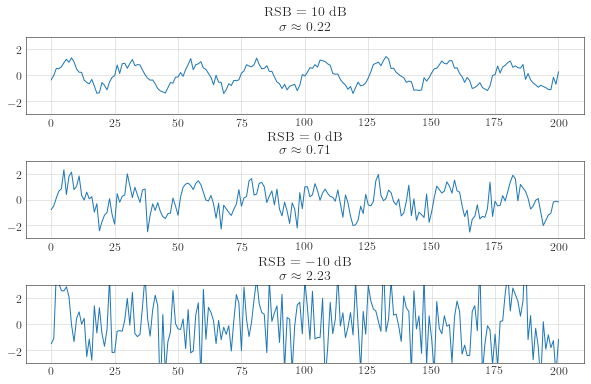

In [3]:
# Sinusoïde bruitée à différents RSB

plt.style.use('seaborn-whitegrid')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Signal non bruité
N = 201
n = np.arange(N)
x = np.sin(2*np.pi*n*0.04)
Px = np.linalg.norm(x)**2/N

# Différents RSB
snrs = [10, 0, -10]
fig = plt.figure(figsize=(10, 6))
i = 0
for snr in snrs:
    
    i += 1
    
    # Observations
    sig = np.sqrt( Px * 10**(-snr/10) )
    y = x + np.random.normal(0, sig, N)
    
    # Affichage
    ax = plt.subplot(3,1,i)
    for side in ['bottom', 'top', 'right', 'left']:
        ax.spines[side].set_color('k')
        ax.spines[side].set_linewidth(0.5)
    ax.set_ylim([-3, 3])
    ax.grid(linewidth=0.5)
    
    plt.plot(n, y, 'tab:blue', linewidth=1)
    
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    title =  f"RSB = ${snr}$ dB\n"
    title += r"$\sigma\approx"
    title += f"{sig:.2f}$"
    plt.title(title, fontsize=14)
    
plt.subplots_adjust(hspace=0.6)    
glue("G:ssp:rsb", fig, display=False)